In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
# Age, Cabin, Embarked columns have NaN data -> needs cleaning
print('\n Data information \n')
print(titanic_df.info())


 Data information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [12]:
# Null collum cleansing
# Age -> mean , Cabin / Embarked -> N (just a simple variant to recognize better)
# use inplace=True to overwrite current variable

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

print('# of Null data\n', titanic_df.isnull().sum())

# of Null data
  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [27]:
# by using value_counts, idenfity whether certain column can be grouped or not
# Also, check to see if data should be cleansed
print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts())
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
B96 B98          4
C23 C25 C27      4
G6               4
F2               3
              ... 
D21              1
B4               1
B50              1
E40              1
B19              1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [30]:
# for cabin, I will just use left-end alphabet to group cabins, should use .str[index] when slicing 
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]
print(titanic_df['Cabin'].head(3))
titanic_df['Cabin'].value_counts()

0    N
1    C
2    N
Name: Cabin, dtype: object


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [31]:
# Checking Sex to Survived
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

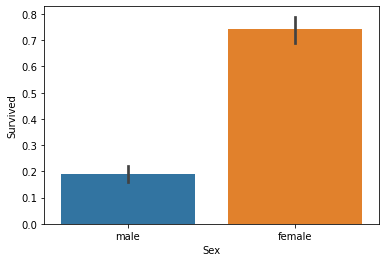

In [32]:
# visualize: Female survival rate is higher than male 
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

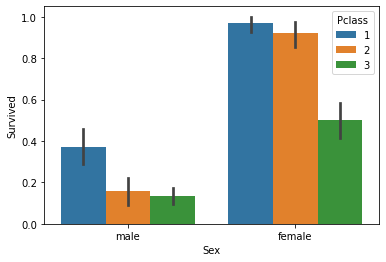

In [43]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=titanic_df)

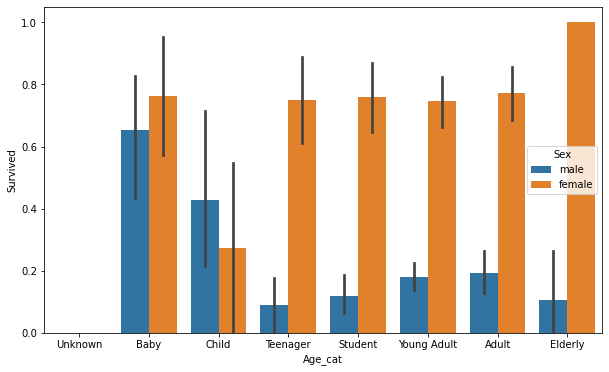

In [46]:
# check to see by age , male child and baby's survival rate is higher than others
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'   
    
    return cat


plt.figure(figsize=(10,6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)

# will drop Age_cat afterwards
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [47]:
# changing non-numbers to numbers
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
             
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [48]:
from sklearn.preprocessing import LabelEncoder

# Null 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])        
    return df


# preprocessing function
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)    
    return df


In [49]:
# 나누기
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis =1)

X_titanic_df = transform_features(X_titanic_df)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter = 1000) # max_iter 문제가 있음

# dt
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTree:{0:.4f} '.format(accuracy_score(y_test, dt_pred)))

# rf
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForest:{0:.4f} '.format(accuracy_score(y_test, rf_pred)))

#lr
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTree:0.7877 
RandomForest:0.8547 
LogisticRegression 정확도: 0.8492


In [71]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print('{0} trial: {1:.4f}'.format(iter_count, accuracy))
    
    mean_score = np.mean(scores)
    print('Average:{0:.4f}'.format(mean_score))       
    

exec_kfold(dt_clf, folds=5)
print()
exec_kfold(rf_clf, folds=5)
print()
exec_kfold(lr_clf, folds=5)

0 trial: 0.7542
1 trial: 0.7809
2 trial: 0.7865
3 trial: 0.7697
4 trial: 0.8202
Average:0.7823

0 trial: 0.7933
1 trial: 0.8090
2 trial: 0.8371
3 trial: 0.7753
4 trial: 0.8596
Average:0.8148

0 trial: 0.8045
1 trial: 0.7809
2 trial: 0.7753
3 trial: 0.7528
4 trial: 0.8202
Average:0.7867


In [82]:
# cross_val
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('{0}: {1:.4f}'.format(iter_count, accuracy))
print('Avg:{0:.4f}'.format(np.mean(scores)))
print()

scores = cross_val_score(rf_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('{0}: {1:.4f}'.format(iter_count, accuracy))
print('Avg:{0:.4f}'.format(np.mean(scores)))
print()

scores = cross_val_score(lr_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('{0}: {1:.4f}'.format(iter_count, accuracy))
print('Avg:{0:.4f}'.format(np.mean(scores)))
print() 

0: 0.7430
1: 0.7753
2: 0.7921
3: 0.7865
4: 0.8427
Avg:0.7879

0: 0.7933
1: 0.7978
2: 0.8483
3: 0.7640
4: 0.8652
Avg:0.8137

0: 0.7933
1: 0.7809
2: 0.7809
3: 0.7697
4: 0.8090
Avg:0.7867



In [99]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, cv=5)
grid_dclf.fit(X_train, y_train)

print(grid_dclf.best_params_)
print('grid_dclf {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('grid_dclf {0:.4f}'.format(accuracy))
print()

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
grid_dclf 0.7992
grid_dclf 0.8715

